In [ ]:
%%writefile requirements.txt
flake8
mypy
pylint
pytest
radon
typing
pdfminer.six
PyPDF2
pdfplumber
rapidocr-onnxruntime
pymupdf
#docstring
Pillow
pytesseract
tesseract
pdf2image
pdfminer
striprtf
opencv-python
pymupdf
imutils
langdetect
scikit-image


Overwriting requirements.txt


In [ ]:
!pip install -r requirements.txt

Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!python read_docs.py

Select folder with documents: data
//----------------------------------//

Processing file 406073854-B1-exam-tips.pdf ... 
Number of pages  4 0

Length of document 406073854-B1-exam-tips.pdf is 4421 characters, processing time 0.6715 seconds

//----------------------------------//

Properly processed 1 files out of 1 (100.0%), 4 pages in total
Total processing time 4.5130 seconds, on average 4.5130 seconds per file, 1.1282 seconds per page

//----------------------------------//

[{'filename': '406073854-B1-exam-tips.pdf', 'content': "B1 exam Preparation tips\nJust polish your grammar skills, as these gonna help in Schreiben and Sprechen.\nSolve sample papers as much as you can and mainly So geht es noch besser, Zertifikat\nNeu, Mit Erfolg and Fit fürs.\nStart with So Geht's, as it has a good level in comparison to all others then solve Mit\nErfolg then the other two.\nTalk to yourself in German, and also you can do a conversation in front of mirror and do\nrecording at the same time, 

In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install PyPDF2

In [ ]:
import re
#FUNKCJA Z PRACY NA WZÓR - TUTAJ JEST ZAPISYWANIE TEKSTU DO NOWEGO PLIKY ALE MOZNA TO SKIPNĄC
def namescreening_preprocess(textfile: str):
    """
    :param text: input text file name for preprocessing
    """
    # Read the file content
    with open(textfile, 'r') as file:
        text = file.read()

    # Remove additional whitespaces around string
    text = text.strip()

    # Replace special characters with spaces
    preproc_name = re.sub(r"[.,\-\'\:\;\_\/\\]", " ", text)

    # Remove any extra spaces left after removing the special characters
    preproc_name = re.sub(r' +', ' ', preproc_name).strip()

    # Lowercase
    preproc_name = preproc_name.lower()

    # Write the processed text to a new file
    with open(f'{textfile}_preprocessed.txt', 'w') as f:
        f.write(preproc_name)

namescreening_preprocess('data/B1-exam-tips.pdf_text.txt')


In [9]:
import PyPDF2

def pdf_to_text(pdf_path, output_txt):
    # Open the PDF file in read-binary mode
    with open(pdf_path, 'rb') as pdf_file:
        # Create a PdfReader object instead of PdfFileReader
        pdf_reader = PyPDF2.PdfReader(pdf_file)

        # Initialize an empty string to store the text
        text = ''

        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    # Write the extracted text to a text file
    with open(output_txt, 'w', encoding='utf-8') as txt_file:
        txt_file.write(text)


In [11]:
import os
for file in os.listdir("./data_pdf"):
    if file.endswith(".pdf"):
        pdf_to_text(os.path.join("./data_pdf", file),os.path.join("./data_txt", file.replace('.pdf', '.txt')))

In [13]:
import re
from collections import Counter
import os
import pandas as pd

def word_frequency(textfile: str):

    with open(textfile, 'r') as file:
        text = file.read()

    #  usuwanie znaków specjalnych, zamiana na małe litery

    preproc_name = re.sub(r"[.,\-\'\:\;\_\/\\]", " ", text)
    preproc_name = re.sub(r' +', ' ', preproc_name).strip().lower()


    words = preproc_name.split()


    word_counts = Counter(words)

    return word_counts

def aggregate_word_frequencies(file_list):
    '''
    Param:
    file_list : list of str
        A list of file paths to text files that need to be processed.

    Return:
    df : pandas.DataFrame
        A DataFrame with two columns:
        - 'word': unique words that appear across all the files
        - 'frequency': the total number of occurrences of each word across all files
        The DataFrame is sorted in descending order by frequency, with the most frequent words first.

    '''
    total_word_counts = Counter()

    for textfile in file_list:

        word_counts = word_frequency(textfile)

        total_word_counts.update(word_counts)

    df = pd.DataFrame(total_word_counts.items(), columns=['word', 'frequency'])

    df = df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    return df


file_list = [os.path.join('./data_txt', file) for file in os.listdir("./data_txt") if file.endswith('.txt')]

final_word_counts = aggregate_word_frequencies(file_list)

final_word_counts

,word,frequency
0,und,9773
1,der,9708
2,die,9317
3,in,6007
4,den,3263
...,...,...
59215,aufweist!,1
59216,fontänen,1
59217,ruhebänke,1
59218,grimmai,1


In [ ]:
def zipf(id, freq):
  return id*freq

final_word_counts['zipf'] = final_word_counts.apply(lambda x: zipf(final_word_counts.index.get_loc(x.name) + 1, x['frequency']), axis=1)

final_word_counts

,word,frequency,zipf
0,you,48,48
1,the,35,70
2,and,32,96
3,to,28,112
4,of,20,100
...,...,...,...
373,better,1,374
374,simple,1,375
375,texts,1,376
376,online,1,377


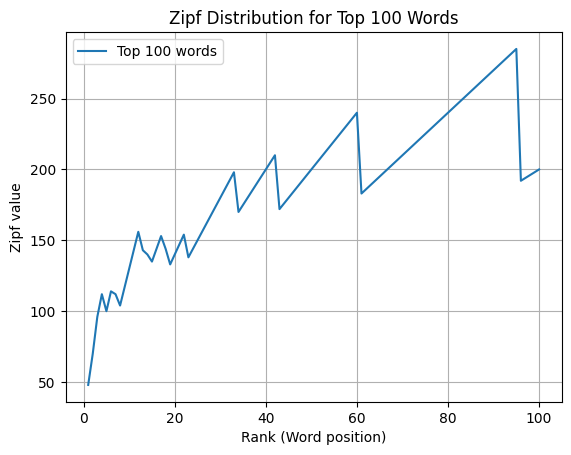

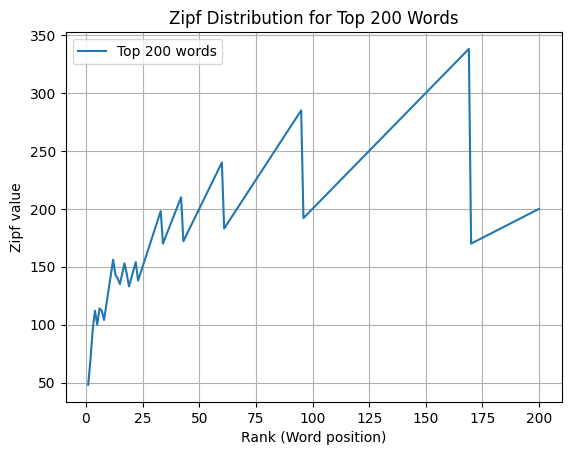

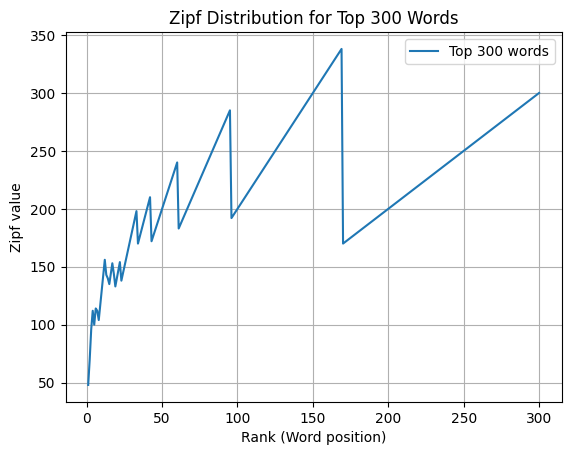

In [ ]:
import matplotlib.pyplot as plt

def plot_zipf_distribution(df, word_counts):
    """
    Plot Zipf distribution for different numbers of top words.

    :param df: DataFrame containing word frequencies and Zipf values
    :param word_counts: List of different counts of top words to plot
    """
    for count in word_counts:
        subset = df.head(count)


        plt.figure()


        plt.plot(subset.index + 1, subset['zipf'], label=f'Top {count} words')


        plt.xlabel('Rank (Word position)')
        plt.ylabel('Zipf value')
        plt.title(f'Zipf Distribution for Top {count} Words')
        plt.legend()
        plt.grid(True)


        plt.show()


plot_zipf_distribution(final_word_counts, [100, 200, 300])


In [ ]:
import networkx as nx
from itertools import tee

def build_word_graph(text):
    """
    Build a word co-occurrence graph from the text.

    Each word is a node, and an edge is created between two words if they occur next to each other in the text.

    Parameters:
    -----------
    text : str
        The input text from which to build the word co-occurrence graph.

    Returns:
    --------
    G : networkx.Graph
        A graph where nodes represent words and edges represent word co-occurrences.
    """
    # Tokenize the text (split into words) and remove any empty strings
    words = [word for word in text.lower().split() if word]

    # Create a graph
    G = nx.Graph()

    # Iterate over pairs of adjacent words and add edges between them
    for word1, word2 in pairwise(words):
        if G.has_edge(word1, word2):
            # If the edge already exists, increase its weight
            #SHOULD WE DO IT ACTUALLY?
            G[word1][word2]['weight'] += 1
        else:
            # Add a new edge between adjacent words
            G.add_edge(word1, word2, weight=1)

    return G

def pairwise(iterable):
    """
    Returns adjacent pairs from the input iterable.

    Example:
    --------
    pairwise([1, 2, 3, 4]) --> (1, 2), (2, 3), (3, 4)
    """
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def get_most_connected_words(graph, top_n=10):
    """
    Find the top N most connected words in the graph based on the number of edges (degree).

    Parameters:
    -----------
    graph : networkx.Graph
        The word co-occurrence graph.

    top_n : int
        The number of most connected words to return.

    Returns:
    --------
    most_connected : list of tuples
        A list of the top N words and their degrees, sorted by degree in descending order.
    """
    # Get the degree (number of edges) for each node (word)
    word_degrees = dict(graph.degree())

    # Sort words by their degree in descending order and select the top N
    most_connected = sorted(word_degrees.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_connected


with open('data/B1-exam-tips.pdf_text.txt_preprocessed.txt', 'r') as file:
  text = file.read()

G = build_word_graph(text)

# Find the most connected words
important_words = get_most_connected_words(G, top_n=5)
print(important_words)


[('the', 57), ('you', 54), ('and', 50), ('to', 37), ('of', 34)]
